In [1]:
from api_wrappers.kraken_wrapper import KrakenWrapper

wrapper = KrakenWrapper(lb_interval="4hr")

all_assets = wrapper.get_assets("USD")
print(len(all_assets))
for asset in all_assets:
    print(asset + "\n")

c:\Users\nick5\miniconda3\envs\tree-env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


476
1INCHUSD

AAVEUSD

ABUSD

ACAUSD

ACHUSD

ACTUSD

ACXUSD

ADAUSD

ADXUSD

AEROUSD

AEVOUSD

AGLDUSD

AI16ZUSD

AIOZUSD

AIRUSD

AIXBTUSD

AKTUSD

ALCHUSD

ALCXUSD

ALGOUSD

ALICEUSD

ALPHAUSD

ALTUSD

ANKRUSD

ANLOGUSD

ANONUSD

APENFTUSD

APEUSD

API3USD

APTUSD

APUUSD

ARBUSD

ARCUSD

ARKMUSD

ARPAUSD

ARUSD

ASRRUSD

ASTRUSD

ATHUSD

ATLASUSD

ATOMUSD

AUCTIONUSD

AUDIOUSD

AUDUSD

AURAUSD

AUSD

AVAAIUSD

AVAXUSD

AXSUSD

B3USD

BABYUSD

BADGERUSD

BALUSD

BANANAS31USD

BANDUSD

BATUSD

BCHUSD

BDXNUSD

BEAMUSD

BERAUSD

BICOUSD

BIGTIMEUSD

BIOUSD

BITUSD

BLURUSD

BLZUSD

BMTUSD

BNBUSD

BNCUSD

BNTUSD

BOBAUSD

BODENUSD

BONDUSD

BONKUSD

BRICKUSD

BSXUSD

BTTUSD

C98USD

CAKEUSD

CATUSD

CCDUSD

CELOUSD

CELRUSD

CFGUSD

CHEEMSUSD

CHEXUSD

CHILLHOUSEUSD

CHRUSD

CHZUSD

CLANKERUSD

CLOUDUSD

CLVUSD

CMETHUSD

COMPUSD

COOKIEUSD

COQUSD

CORNUSD

COTIUSD

COWUSD

CPOOLUSD

CQTUSD

CROUSD

CRVUSD

CSMUSD

CTSIUSD

CVCUSD

CVXUSD

CXTUSD

CYBERUSD

DAIUSD

DASHUSD

DBRUSD

D

In [2]:
hist_dict = wrapper.load_hist_files()

In [6]:
test_key = list(hist_dict.keys())[4]
test_result = hist_dict[test_key]

print(test_result)
for row in test_result:
    print(row)

           date   open   high    low  close   vwap           vol
0    1691798400  12.46  12.49  12.43  12.43  12.46    176.836609
1    1691884800  12.34  12.37  12.21  12.26  12.32    243.996236
2    1691971200  12.21  12.44  12.21  12.38  12.36    606.079066
3    1692057600  12.36  12.65  11.32  11.82  12.03   7074.104539
4    1692144000  11.84  11.86  11.10  11.38  11.60   4189.593395
..          ...    ...    ...    ...    ...    ...           ...
715  1753574400  24.92  26.43  24.74  26.04  24.85  40746.116013
716  1753660800  26.10  27.34  25.01  25.15  26.21  13750.035928
717  1753747200  25.19  25.48  23.92  24.35  24.66  13022.491244
718  1753833600  24.23  24.48  22.42  23.30  23.40   6179.282185
719  1753920000  23.32  23.54  23.32  23.51  23.42     60.022840

[720 rows x 7 columns]
date
open
high
low
close
vwap
vol


In [7]:
import pandas as pd
df = test_result
print(df.head())

         date   open   high    low  close   vwap          vol
0  1691798400  12.46  12.49  12.43  12.43  12.46   176.836609
1  1691884800  12.34  12.37  12.21  12.26  12.32   243.996236
2  1691971200  12.21  12.44  12.21  12.38  12.36   606.079066
3  1692057600  12.36  12.65  11.32  11.82  12.03  7074.104539
4  1692144000  11.84  11.86  11.10  11.38  11.60  4189.593395


AVAXUSDT.txt
Standard Deviation: 0.04942785929216245
Variance: 0.00244311327420581
Mean: 0.0008204332283571954


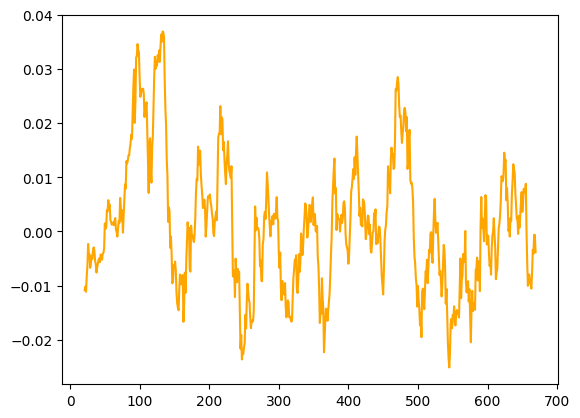

In [10]:
import numpy as np
import matplotlib.pyplot as plt
df['close'] = pd.to_numeric(df['close'], errors='coerce')
log_returns = np.log(df['close'][:-50]).diff().dropna()
print(test_key)
plt.plot(log_returns.rolling(21).mean(), label='Rolling Mean (21 days)', color='orange')
print("Standard Deviation:", log_returns.std())
print("Variance:", log_returns.var())
#plt.plot(df['close'], label='Close Price', color='blue')
print("Mean:", log_returns.mean())

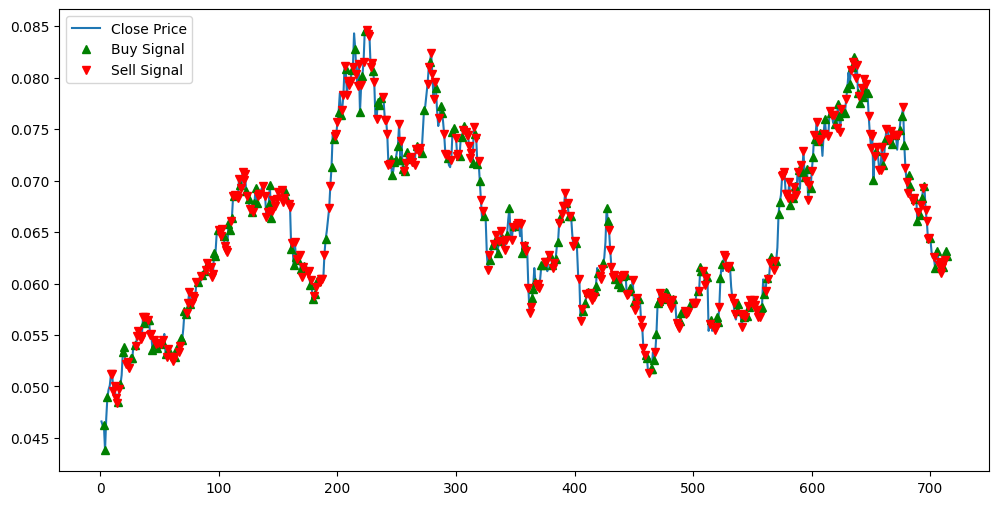

In [25]:
# Calculate log returns
log_returns = np.log(df['close']).diff()

# Align log_returns with df by shifting (since .diff() loses the first row)
df = df.iloc[1:].copy()
log_returns = log_returns.iloc[1:]  # Remove the first NaN after diff

# Buy signal: log return below 0
df['Signal'] = 0
df.loc[(log_returns.shift(1) < log_returns), 'Signal'] = 1

# Sell signal: two consecutive days of log return below 0
sell_mask = (log_returns.shift(3) > log_returns)
df.loc[sell_mask, 'Signal'] = -1

# Optional: Shift signals to avoid lookahead bias
df['Signal'] = df['Signal'].shift(1).fillna(0)

# Plot signals
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price')
plt.plot(df[df['Signal'] == 1].index, df['close'][df['Signal'] == 1], '^', color='g', label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['close'][df['Signal'] == -1], 'v', color='r', label='Sell Signal')
plt.legend()
plt.show()

{'Initial Balance': 10000, 'Final Balance': 12668.05338971488, 'Total Return (%)': 26.680533897148802, 'Max Drawdown (%)': -23.485577650660545, 'Sharpe Ratio': 0.5162340075446895}


c:\Users\nick5\dev\hypercube_ai\ai\treetrader\utils\backtester.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9450.58315334773' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Portfolio'] = balance + (position * df.loc[i, 'close'])


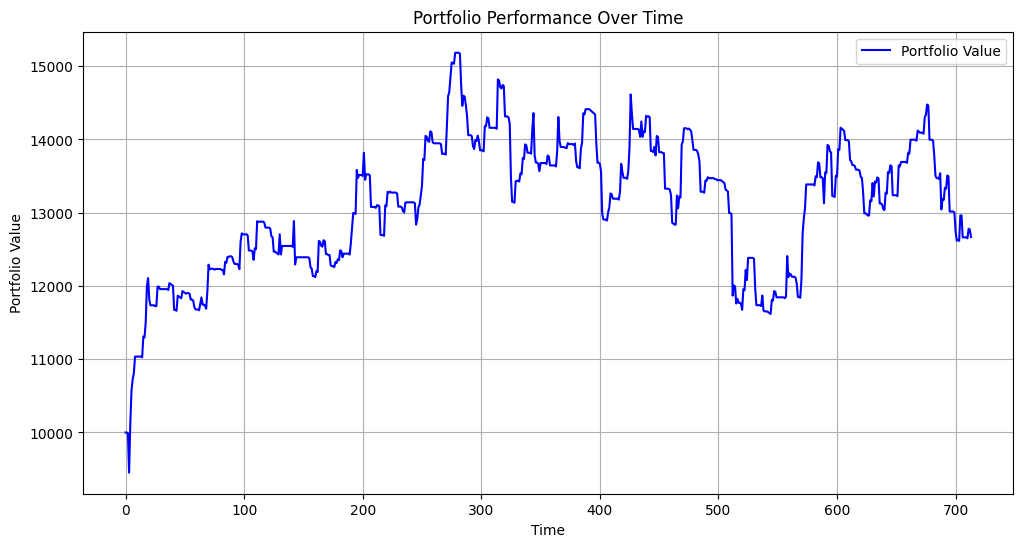

In [26]:
from utils.backtester import Backtester

# Initialize backtester
backtester = Backtester(initial_balance=10000)

df = df.reset_index(drop=True)

# Now run the backtest as usual
result_df = backtester.simple_backtest(df, signal_column='Signal')

# Calculate and print performance metrics
perf = backtester.calculate_performance(result_df)
print(perf)

# Plot portfolio performance
backtester.plot_performance(result_df)

In [27]:
sigma = log_returns.std()

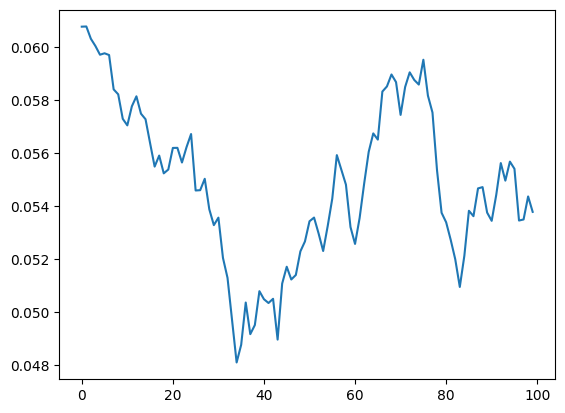

In [28]:
from utils.synthetic_data_service import SyntheticOHLCVGenerator


dg = SyntheticOHLCVGenerator(
    mu=log_returns.mean(),
    sigma=sigma,
    dt=1,  # If your data is daily, dt=1
    n_steps=100,  # Number of data points to generate
    seed=89,  # For reproducibility
    #start_price=df['close'].iloc[-1]  # Start from the last close price
)

test_data = dg.generate(start=df['close'].iloc[-1])
df_test = pd.DataFrame(test_data, columns=bar_data_names)

plt.plot(df_test['close'])



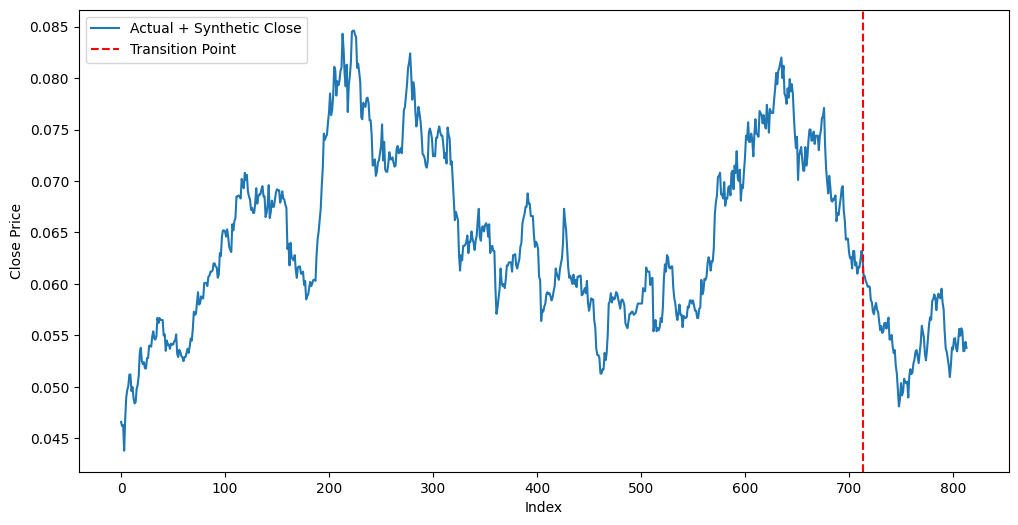

In [29]:
# Ensure both DataFrames have the same columns and index order
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Concatenate real and synthetic data
combined_df = pd.concat([df, df_test], ignore_index=True)

# Plot the combined close prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(combined_df['close'], label='Actual + Synthetic Close')
plt.axvline(len(df)-1, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

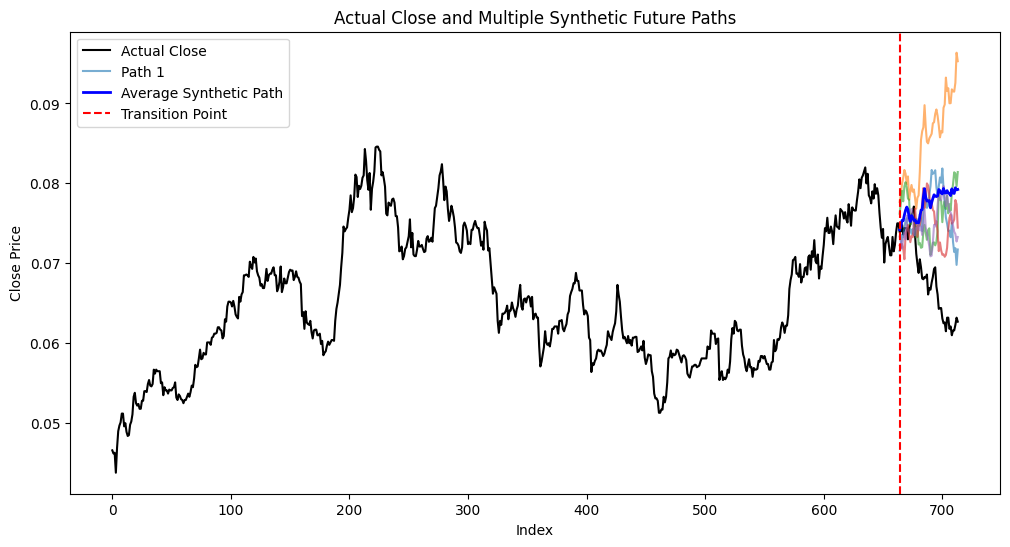

In [34]:
# Number of synthetic paths to generate
#seeds = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210]  # Different seeds for variety
seeds = range(100, 100 + 5)
num_paths = len(seeds)
gen_start = 50  # Start generating synthetic paths from the last 100 points of actual data
synthetic_paths = []

for seed in seeds:
    dg = SyntheticOHLCVGenerator(
        mu=log_returns.mean(),
        sigma=sigma,
        dt=1,
        n_steps=gen_start,
        seed=seed
    )
    test_data = dg.generate(start=df['close'].iloc[-gen_start])
    synthetic_paths.append(test_data['close'].values)

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='black', label='Actual Close')

# Plot all synthetic paths

for i, path in enumerate(synthetic_paths):
    plt.plot(range(len(df)-gen_start, len(df) + len(path)-gen_start), path, alpha=0.6, label=f'Path {i+1}' if i == 0 else None)

# Convert list of arrays to a 2D NumPy array
paths_array = np.array(synthetic_paths)  # shape: (num_paths, n_steps)

# Calculate the average path
avg_path = paths_array.mean(axis=0)
# Plot the average synthetic path
plt.plot(range(len(df)-gen_start, len(df) + len(avg_path) - gen_start), avg_path, color='blue', linewidth=2, label='Average Synthetic Path')


plt.axvline(len(df)-gen_start, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual Close and Multiple Synthetic Future Paths')
plt.show()